# Text Classification of news

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data

In [ ]:
import pandas as pd #pandas library

data = pd.read_csv('/content/drive/MyDrive/Financial News/alldata.csv',encoding='latin-1',header=None) #Reading dataset file 
data.head() #printing demo data in dataset

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
text_news = data[1] #News data
sentiment = data[0] #Sentiment of the news

### Preprocessing of the text data

In [ ]:
#importing modules for preprocessing 
#Using nltk for preprocessing the data 

from tqdm import tqdm
import re
import nltk
nltk.download('punkt','stopwords')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to stopwords...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
lan_stemmer = LancasterStemmer() #Lancaster Stemmer
wordnet_lemmatizer = WordNetLemmatizer() #Lemmatizer

processedWords_news = [[]] #processed words

for i in text_news:
    
    tokens =  word_tokenize(i)
    
    stopWordsRemoved = []
    stopWords = set(stopwords.words('english'))
    for token in tokens:
        if token not in stopWords:
            if token.replace(' ', '') != '':
                if len(token) > 1:
                    stopWordsRemoved.append(token) #stop word removal
    
    finalWords = []
    for token in stopWordsRemoved:
        token = wordnet_lemmatizer.lemmatize(token) #lemmatizing
        token = lan_stemmer.stem(token)
        if len(token) > 1:
            finalWords.append(token)
            
    processedWords_news.append(finalWords)

#final processed words
processedWords_news.pop(0)


count = 0
null_index = []

labelsF = sentiment #updated op list
rows_len = len(processedWords_news)

try:
    while(count<rows_len):
       
        if(len(processedWords_news[count])==0):
            processedWords_news.pop(count-1)
            labelsF.pop(count-1)
            null_index.append(count-1)
        count = count + 1
except:
    print("error found")
    


In [ ]:
print(processedWords_news)

[['accord', 'gran', 'company', 'plan', 'mov', 'produc', 'russ', 'although', 'company', 'grow'], ['technopol', 'plan', 'develop', 'stag', 'are', 'le', '100,000', 'squ', 'met', 'ord', 'host', 'company', 'work', 'comput', 'technolog', 'telecommun', 'stat', 'said'], ['the', 'intern', 'electron', 'industry', 'company', 'elcoteq', 'laid', 'ten', 'employ', 'tallin', 'facil', 'cont', 'ear', 'layoff', 'company', 'contract', 'rank', 'off', 'work', 'dai', 'postim', 'report'], ['with', 'new', 'produc', 'plant', 'company', 'would', 'increas', 'capac', 'meet', 'expect', 'increas', 'demand', 'would', 'improv', 'us', 'raw', 'mat', 'theref', 'increas', 'produc', 'profit'], ['accord', 'company', "'s", 'upd', 'strategy', 'year', '2009-2012', 'basw', 'target', 'long-term', 'net', 'sal', 'grow', 'rang', '20', '-40', 'op', 'profit', 'margin', '10', '-20', 'net', 'sal'], ['fin', 'of', 'aspocomp', "'s", 'grow', 'aspocomp', 'aggress', 'pursu', 'grow', 'strategy', 'increas', 'focus', 'technolog', 'demand', 'hdi

In [ ]:
print(labelsF)

0        neutral
1        neutral
2       negative
3       positive
4       positive
          ...   
4841    negative
4842     neutral
4843    negative
4844    negative
4845    negative
Name: 0, Length: 4846, dtype: object


### Converting the categorical classes to numerical class.

In [ ]:
#Using keras 
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

import numpy as np

labelCategorical = [] #for neural network
labelBinary = [] #numerical categorical labels
for j in labelsF:
    if(j == 'negative'):
        labelCategorical.append(0)
        labelBinary.append([1,0,0])
    if(j == 'neutral'):
        labelCategorical.append(1)
        labelBinary.append([0,1,0])
    if(j == 'positive'):
        labelCategorical.append(2)
        labelBinary.append([0,0,1])
    
#Converting the output label to numerical category 

labelBinaryNp = np.array(labelBinary) 
print(list(labelBinaryNp))

[array([0, 1, 0]), array([0, 1, 0]), array([1, 0, 0]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0,

### Initialize parameter values for embedding

In [ ]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Tokenizer


In [ ]:
#Import Tensorflow Tokenizer and pad sequences
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Tokenizer fit data
tokenizer = Tokenizer ( num_words=10000)
tokenizer.fit_on_texts(processedWords_news)

#word sequence
word_index=tokenizer.word_index

#text to sequences
sequencesNewsData   =tokenizer.texts_to_sequences(processedWords_news)

In [ ]:
print(len(sequencesNewsData))

4846


### Pad sequences

In [ ]:
import numpy as np
max_length = maxlen #maximum length
padded_seqND = pad_sequences(sequencesNewsData, maxlen=200) #padding sequence with max length as 20

In [ ]:
padded_seqND = np.array(padded_seqND) #converting into numpy array
print(padded_seqND.shape) #shape after padding

(4846, 200)


### Vocab mapping


In [ ]:
tokenizer.word_index

{'the': 1,
 'eur': 2,
 "'s": 3,
 'company': 4,
 'fin': 5,
 'op': 6,
 'said': 7,
 'mn': 8,
 'sal': 9,
 'mil': 10,
 '``': 11,
 'shar': 12,
 'profit': 13,
 'net': 14,
 'produc': 15,
 'serv': 16,
 'new': 17,
 'finland': 18,
 'group': 19,
 'year': 20,
 'market': 21,
 '2009': 22,
 'mln': 23,
 'busy': 24,
 '2008': 25,
 'period': 26,
 'quart': 27,
 '2007': 28,
 'oys': 29,
 '2010': 30,
 'in': 31,
 'increas': 32,
 'euro': 33,
 'also': 34,
 'us': 35,
 'develop': 36,
 'invest': 37,
 'includ': 38,
 'tot': 39,
 'first': 40,
 'contract': 41,
 'off': 42,
 'corp': 43,
 'solv': 44,
 '2006': 45,
 'man': 46,
 'provid': 47,
 'report': 48,
 'comp': 49,
 'helsink': 50,
 'nok': 51,
 'loss': 52,
 'bank': 53,
 'mak': 54,
 'manufact': 55,
 'unit': 56,
 'technolog': 57,
 'ord': 58,
 'plant': 59,
 'custom': 60,
 'today': 61,
 'sign': 62,
 'mobl': 63,
 'system': 64,
 'expect': 65,
 'accord': 66,
 'employ': 67,
 'it': 68,
 'per': 69,
 'correspond': 70,
 'perc': 71,
 'agr': 72,
 'project': 73,
 'cent': 74,
 'russ': 7

### Set number of words

In [ ]:
#Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary
num_words = len(tokenizer.word_index) + 1
print(num_words)

8652


## Load Glove Word Embeddings

### Create embedding matrix

In [ ]:
#EMBEDDING_FILE = './glove.6B.200d.txt'
#data set linkhttps://www.kaggle.com/datasets/incorpes/glove6b200d?select=glove.6B.200d.txt
EMBEDDING_FILE = '/content/drive/MyDrive/Glove/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix.shape)

(8652, 200)


# Navie Bayes Classifier

## Train test split


In [ ]:
from sklearn.model_selection import train_test_split

#Train test split for Navie Bayes
X_train, X_test, y_train, y_test = train_test_split(padded_seqND, labelCategorical, test_size=0.3, random_state=10)

#Training data size is 70% and validation data size is 30% 

## Classifier

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB

#Bernoulli NB
MNB = BernoulliNB()

#fitting the data
MNB.fit(X_train, y_train)

#prediction
predicted = MNB.predict(X_test)

#accuracy
acc_score = metrics.accuracy_score(predicted,y_test)
print("Accuracy score : ",acc_score)

#f1_score
score = metrics.f1_score(predicted,y_test,average='weighted')
print("F1 score : ", score)

Accuracy score :  0.5275103163686382
F1 score :  0.5610591961043706


# Train test split for neural networks


In [ ]:
from sklearn.model_selection import train_test_split

#Train test split
X_train, X_test, y_train, y_test = train_test_split(padded_seqND, labelBinaryNp, test_size=0.3, random_state=10)

#Training data size is 70% and validation data size is 30% 

## Validation and training graph function

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#function to plot the Training and validation accuracy as well as loss
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Bidirectional LSTM Model


In [ ]:

from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from tensorflow.keras import layers

#Building the required model
model = Sequential()
model.add(Embedding(num_words, weights=[embedding_matrix], input_length = 200,output_dim=200))
model.add(Bidirectional(LSTM(10, input_shape=(200, 1))))
model.add(Flatten())
model.add(Dense(3,activation='sigmoid'))


#model Summary
print(model.summary())


#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          1730400   
                                                                 
 bidirectional (Bidirectiona  (None, 20)               16880     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 3)                 63        
                                                                 
Total params: 1,747,343
Trainable params: 1,747,343
Non-trainable params: 0
_________________________________________________________________
None


Training Accuracy: 0.9982
Testing Accuracy:  0.7235


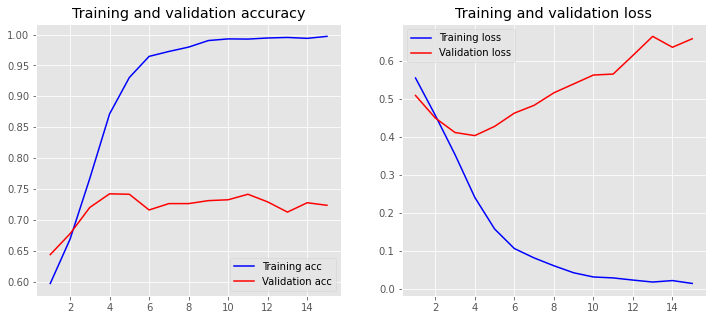

In [ ]:
#model history
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
#loss and accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

## Results

In [ ]:
#Obtaining f1_Score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#model prediction
y_pred1  = model.predict(X_test)

y_pred2 = np.argmax(y_pred1, axis=1)
y_test2 = np.argmax(y_test, axis=1)

#f1 score
score = f1_score(y_test2,y_pred2,average='weighted')
print("F1 score : ", score)

F1 score :  0.7226783647077781


#  LSTM


In [ ]:


#Building the required model
model = Sequential()
model.add(Embedding(num_words, weights=[embedding_matrix], input_length = 200,output_dim=200))
model.add(LSTM(10, input_shape=(200, 1)))
model.add(Flatten())
model.add(Dense(3,activation='sigmoid'))


#model Summary
print(model.summary())
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 200)          1730400   
                                                                 
 lstm_1 (LSTM)               (None, 10)                8440      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,738,873
Trainable params: 1,738,873
Non-trainable params: 0
_________________________________________________________________
None


## Results

Training Accuracy: 0.9971
Testing Accuracy:  0.7201


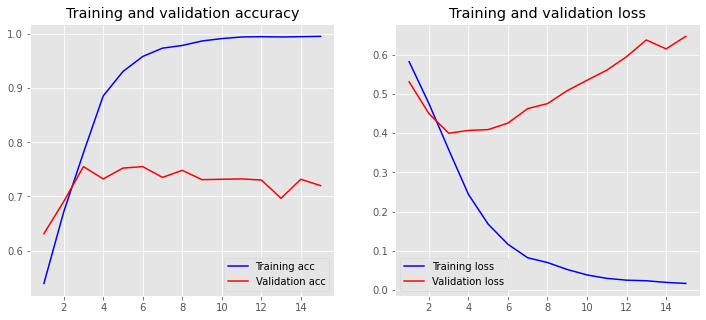

In [ ]:
#model history
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
#loss and accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
#Obtaining f1_Score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#model prediction
y_pred1  = model.predict(X_test)

y_pred2 = np.argmax(y_pred1, axis=1)
y_test2 = np.argmax(y_test, axis=1)

#f1 score
score = f1_score(y_test2,y_pred2,average='weighted')
print("F1 score : ", score)

F1 score :  0.7186781796218117


# CNN 



## CNN model

In [ ]:
#CNN Model
model = Sequential()
model.add(Embedding(num_words, weights=[embedding_matrix], input_length = 200,output_dim=200))
#convolution layer
model.add(layers.Conv1D(64, 3))
#global max pooling
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])
   
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 200)          1730400   
                                                                 
 conv1d (Conv1D)             (None, 198, 64)           38464     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,769,547
Trainable params: 1,769,547
Non-trainable params: 0
____________________________________________

## Results

Training Accuracy: 0.9994
Testing Accuracy:  0.7627


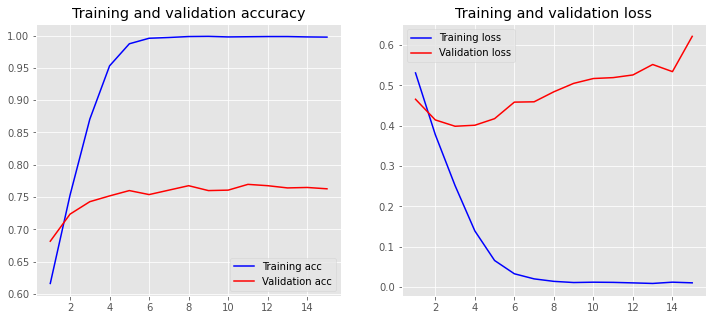

In [ ]:
#model history
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
#loss and accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
#Obtaining f1_Score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#model prediction
y_pred1  = model.predict(X_test)

y_pred2 = np.argmax(y_pred1, axis=1)
y_test2 = np.argmax(y_test, axis=1)

#f1 score
score = f1_score(y_test2,y_pred2,average='weighted')
print("F1 score : ", score)

F1 score :  0.7475769624542675


# RNN


In [ ]:
# RNN Model

model = Sequential()
model.add(layers.Embedding(num_words, weights=[embedding_matrix], input_length = 200,output_dim=200))

# GRU Layer
model.add(layers.GRU(100, return_sequences=True))

#Simple RNN layer
model.add(layers.SimpleRNN(64))

model.add(layers.Dense(10))

model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 200)          1730400   
                                                                 
 gru (GRU)                   (None, 200, 100)          90600     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,832,243
Trainable params: 1,832,243
Non-trainable params: 0
_________________________________________________________________


## Results

Training Accuracy: 0.9988
Testing Accuracy:  0.7318


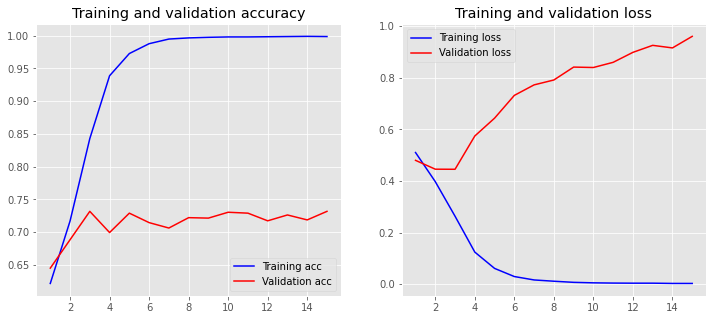

In [ ]:
#model history
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
#loss and accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
#Obtaining f1_Score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#model prediction
y_pred1  = model.predict(X_test)

y_pred2 = np.argmax(y_pred1, axis=1)
y_test2 = np.argmax(y_test, axis=1)

#f1 score
score = f1_score(y_test2,y_pred2,average='weighted')
print("F1 score : ", score)

F1 score :  0.7282768605664199


# CNN-LSTM


In [ ]:
#CNN + LSTM LAYER
model = Sequential()

model.add(Embedding(num_words, weights=[embedding_matrix], input_length = 200,output_dim=200))
#CNN
model.add(layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
#LSTM
model.add(LSTM(100))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])

## Results

Training Accuracy: 0.9988
Testing Accuracy:  0.7311


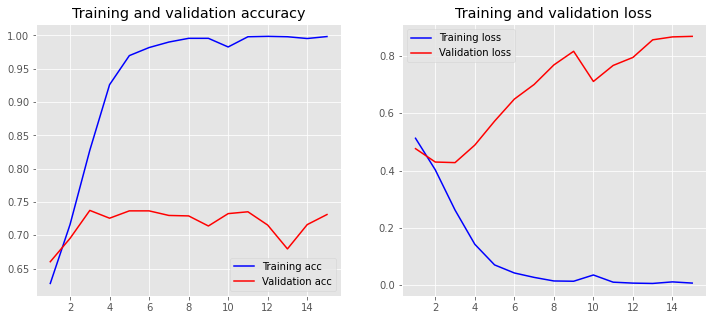

In [ ]:
#model history
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
#loss and accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
#Obtaining f1_Score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#model prediction
y_pred1  = model.predict(X_test)

y_pred2 = np.argmax(y_pred1, axis=1)
y_test2 = np.argmax(y_test, axis=1)

#f1 score
score = f1_score(y_test2,y_pred2,average='weighted')
print("F1 score : ", score)

F1 score :  0.7304737849504457


# Comparision of f1_Score and validation accuracy

In [ ]:
#R2 Score, Mean Absolute Error and Root Mean Square error of methods
Models_used = ["Navie Bayes Classifier", "CNN", "RNN","LSTM" , "Bidirectional LSTM", "CNN + LSTM"]


Models_accuracy_validation = [52.75,70.63,71.11,68.78,72.76,73.93]
Models_f1_score = [56.10,70.80,71.15,68.82,72.43,73.35]

<Figure size 432x288 with 0 Axes>

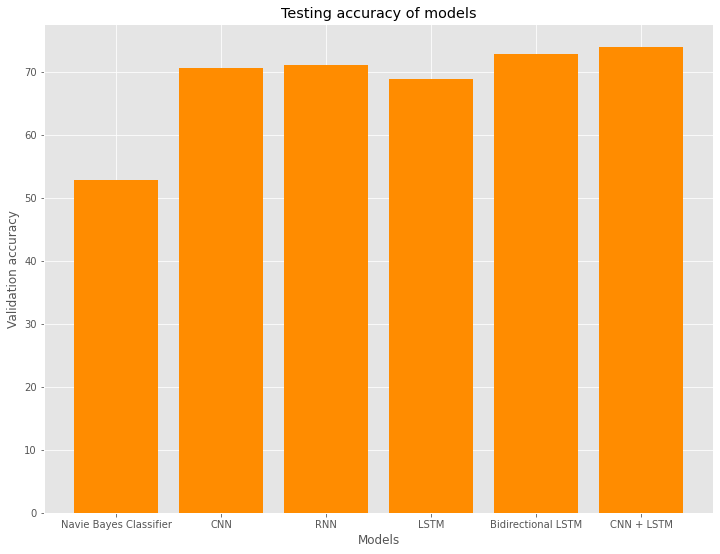

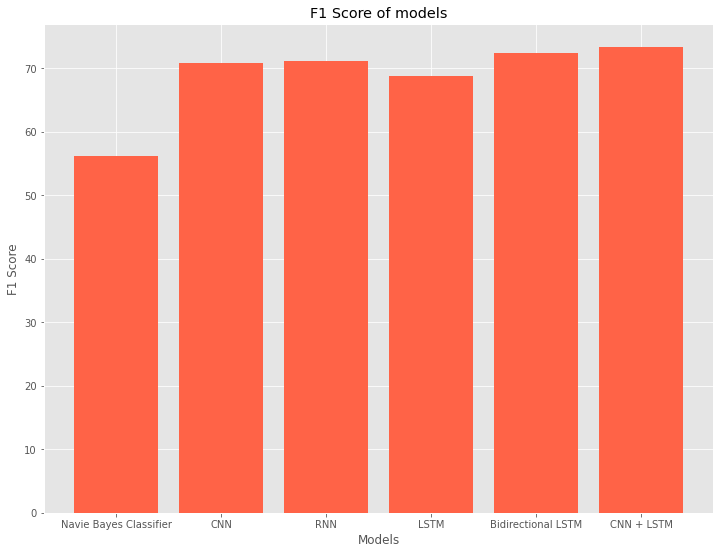

In [ ]:
#Models and thier performance
import matplotlib.pyplot as plt
fig = plt.figure()


plt.figure(figsize=(12, 9))

#Bar plot of accuracy of the models
plt.bar(Models_used, Models_accuracy_validation, color = "darkorange")
plt.xlabel("Models") 
plt.ylabel("Validation accuracy") 
plt.title("Testing accuracy of models") 
plt.show()


plt.figure(figsize=(12, 9))

# Bar plot of f1 score of models 
plt.bar(Models_used, Models_f1_score, color = "tomato")
plt.xlabel("Models") 
plt.ylabel("F1 Score") 
plt.title("F1 Score of models") 
plt.show()

